# Determining the Wine Quality by Random Forest

###### May 15 2019

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import sklearn 

In [4]:
# Loading the dataset into the dataframe
wine = pd.read_csv("E:/Data Scientist/Datasets/winequality-red.csv")
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
# Explore the dataset using the basic statstics methods 
print(wine.describe())
print("\n")
print(wine.info())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [12]:
# Look for the missing values 
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [30]:
# Classifying the condition of according to the values
conditions = [(wine['quality']>6),
             (wine['quality']==6),
             (wine['quality']<6)]
choices = ['good','normal','bad']

In [33]:
# adding these conditions to the dataframe as new column
wine['taste']= np.select(conditions,choices)
print(wine.head())
wine = wine.drop

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality   taste  
0      9.4        5     bad  
1      9.8        5     ba

In [45]:
# Now we split the dataset into train and test set
from sklearn.model_selection import train_test_split
#Independent variable from the dataset
wine_inde = wine.iloc[:,0:11]
wine_dep = wine.iloc[:,-1]
wine_inde_train, wine_inde_test,wine_dep_train,wine_dep_test= train_test_split(wine_inde,wine_dep,test_size = 0.3,random_state = 42)

In [52]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)
# Training our model
clf.fit(wine_inde_train,wine_dep_train)
#predict the dep from the test set
target_pred =clf.predict(wine_inde_test)

In [54]:
# Import the metrics to find the accuracy
from sklearn import metrics
# compare the predict model with the test set
print("Accuracy:",metrics.accuracy_score(wine_dep_test,target_pred))

Accuracy: 0.68125


In [56]:
# Important features  of the dataset
feature_imp = pd.Series(clf.feature_importances_,index = wine_inde.columns).sort_values(ascending = False)
feature_imp

alcohol                 0.152732
sulphates               0.124423
volatile acidity        0.100600
total sulfur dioxide    0.100297
density                 0.094140
chlorides               0.081893
citric acid             0.074164
pH                      0.070944
fixed acidity           0.069286
residual sugar          0.067569
free sulfur dioxide     0.063951
dtype: float64

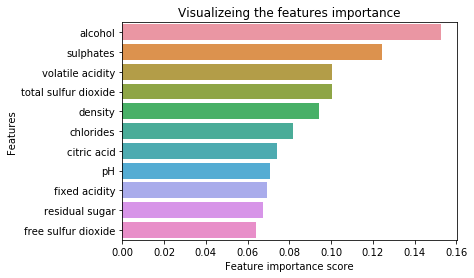

In [58]:
# Visualize the features using the most influencing features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y = feature_imp.index)
#add label to the graph
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Visualizing the features importance')
plt.legend()
plt.show()

In [79]:
# from the plot main fetaures which are affecting the dataset are 'alcohol','sulphates','volatile acidity' and 'total sulfur'
wine_inde1 = wine[['alcohol','sulphates','volatile acidity','total sulfur dioxide']]
wine_dep1 = wine[['taste']]
wine_inde1_train,wine_inde1_test,wine_dep1_train,wine_dep1_test= train_test_split(wine_inde1,wine_dep,test_size=0.3,random_state=42)
# Now train the model
clf.fit(wine_inde1_train,wine_dep1_train)
target_pred1= clf.predict(wine_inde1_test)
# finding the accuracy of the model
print("accuracy:",metrics.accuracy_score(target_pred1,wine_dep1_test))

accuracy: 0.69375


In [80]:
# As you can see there increase in the accuracy of the model